In [277]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [278]:
data = pd.read_csv('data.csv', sep = '\t', delimiter = None)

In [279]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [280]:
# duplicate data
data_1 = data.copy()
# Remove major
data_1 = data_1.drop(['major', 'country', 'uniquenetworklocation', 'source'],axis=1)
# Remove time and position
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1 = data_1.drop(position,axis=1)
data_1 = data_1.drop(time,axis=1)
# remove introelapse, testelapse, surveyelapse
data_1 = data_1.drop(data_1.iloc[:,42:45],axis=1)
data_2 = data_1.copy()
# Remove VCL
data_2 = data_2.drop(data_2.iloc[:,52:68],axis=1)
data_2 = data_2.replace(to_replace=0,value=3)
# Rename Ten Item Personlaity code
data_2 = data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_1.shape)
print('Attributes',data_1.columns)
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 81)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize'],
      dtype='object')
Shape (39775, 65)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',

In [281]:
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize
0,4,4,2,4,4,4,4,4,2,1,...,2,16,1,1,12,1,10,2,1,2
1,4,1,2,3,4,4,3,4,3,2,...,1,16,2,2,7,3,70,2,1,4
2,3,1,4,1,4,3,1,3,2,4,...,2,17,2,1,4,3,60,1,1,3
3,2,3,2,1,3,3,4,2,3,3,...,1,13,2,2,4,5,70,2,1,5
4,2,2,3,4,4,2,4,4,4,3,...,2,19,2,3,10,1,10,2,1,4


In [282]:
# Grouping age
def condition(x):
    if x <= 10:
        return 'Under Age'
    if  10 <= x <= 16:
        return 'Children'
    if 17 <= x <= 21:
        return 'Teen'
    if 21 <= x <= 35:
        return 'Adults'
    if 36 <= x <= 48:
        return 'Elder Adults'
    if x >= 49:
        return 'Older People'

data_2['AgeGroups'] = data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,4,4,2,4,4,4,4,4,2,1,...,16,1,1,12,1,10,2,1,2,Children
1,4,1,2,3,4,4,3,4,3,2,...,16,2,2,7,3,70,2,1,4,Children
2,3,1,4,1,4,3,1,3,2,4,...,17,2,1,4,3,60,1,1,3,Teen
3,2,3,2,1,3,3,4,2,3,3,...,13,2,2,4,5,70,2,1,5,Children
4,2,2,3,4,4,2,4,4,4,3,...,19,2,3,10,1,10,2,1,4,Teen


In [283]:
# Filter DAS
data_das = data_2.iloc[:,42:]
print('Attributes',data_das.columns)
data_3=data_2.filter(regex='Q\d{1,2}A')
print('Attributes',data_3.columns)
# data_3.head()


Attributes Index(['Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A'],
      dtype='object')


In [284]:
# Categorized DAS
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3 = sub(data_3)
das_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
d = []
for i in das_keys["Depression"]:
    d.append('Q'+str(i)+'A')
s = []
for i in das_keys["Stress"]:
    s.append('Q'+str(i)+'A')
a = []
for i in das_keys["Anxiety"]:
    a.append('Q'+str(i)+'A')
depression = data_3.filter(d)
stress = data_3.filter(s)
anxiety = data_3.filter(a)

In [285]:
# scoring system
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [286]:
# DAS set
display(depression.head(), stress.head(), anxiety.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [287]:
DEPRESSION = pd.merge(depression, data_das, how='inner', left_index=True, right_index=True)
ANXIETY = pd.merge(anxiety, data_das, how='inner', left_index=True, right_index=True)
STRESS = pd.merge(stress, data_das, how='inner', left_index=True, right_index=True)

print('Attributes',DEPRESSION.columns)
display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

Attributes Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Total_Count',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,1,3,0,3,3,2,0,3,3,3,...,16,1,1,12,1,10,2,1,2,Children
1,1,3,1,3,2,3,1,1,2,1,...,16,2,2,7,3,70,2,1,4,Children
2,3,3,3,3,3,3,3,3,0,3,...,17,2,1,4,3,60,1,1,3,Teen
3,1,2,2,0,1,2,0,0,1,2,...,13,2,2,4,5,70,2,1,5,Children
4,2,3,2,3,2,3,2,1,3,2,...,19,2,3,10,1,10,2,1,4,Teen


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,3,3,3,3,3,3,3,...,16,1,1,12,1,10,2,1,2,Children
1,3,3,3,1,1,3,1,2,2,2,...,16,2,2,7,3,70,2,1,4,Children
2,2,2,2,1,0,0,1,2,1,1,...,17,2,1,4,3,60,1,1,3,Teen
3,1,2,1,1,0,3,0,0,3,2,...,13,2,2,4,5,70,2,1,5,Children
4,1,1,3,1,3,3,3,2,1,1,...,19,2,3,10,1,10,2,1,4,Teen


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,1,3,2,2,3,3,2,...,16,1,1,12,1,10,2,1,2,Children
1,0,2,2,2,2,0,0,0,1,3,...,16,2,2,7,3,70,2,1,4,Children
2,0,0,0,1,3,1,0,1,1,0,...,17,2,1,4,3,60,1,1,3,Teen
3,2,0,3,2,1,0,1,0,0,0,...,13,2,2,4,5,70,2,1,5,Children
4,1,3,3,3,3,3,3,3,3,3,...,19,2,3,10,1,10,2,1,4,Teen


In [288]:
def depression_condition(x):
    if x <= 9:
        return 'Normal'
    if  10 <= x <= 13:
        return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    if 21 <= x <= 27:
        return 'Severe'
    if x > 28:
        return 'Extremely Severe'

def anxiety_condition(x):
    if x <= 9:
        return 'Normal'
    if  10 <= x <= 13:
        return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    if 21 <= x <= 27:
        return 'Severe'
    if x > 28:
        return 'Extremely Severe'

def stress_condition(x):
    if x <= 9:
        return 'Normal'
    if  10 <= x <= 13:
        return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    if 21 <= x <= 27:
        return 'Severe'
    if x > 28:
        return 'Extremely Severe'

DEPRESSION['Condition'] = DEPRESSION['Total_Count'].apply(depression_condition)
ANXIETY['Condition'] = ANXIETY['Total_Count'].apply(anxiety_condition)
STRESS['Condition'] = STRESS['Total_Count'].apply(stress_condition)

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,2,7,3,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,2,1,4,3,60,1,1,3,Teen,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,2,7,3,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,2,1,4,3,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,2,7,3,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,2,1,4,3,60,1,1,3,Teen,Mild
3,2,0,3,2,1,0,1,0,0,0,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


In [289]:
# Simplified variable
data_depression=DEPRESSION.copy()
data_anxiety=DEPRESSION.copy()
data_stress=DEPRESSION.copy()

def depression_value(x):
    if x <= 9:
        return 0
    if  10 <= x <= 13:
        return 1
    if 14 <= x <= 20:
        return 2
    if 21 <= x <= 27:
        return 3
    if x > 28:
        return 4

def anxiety_value(x):
    if x <= 9:
        return 0
    if  10 <= x <= 13:
        return 1
    if 14 <= x <= 20:
        return 2
    if 21 <= x <= 27:
        return 3
    if x > 28:
        return 4

def stress_value(x):
    if x <= 9:
        return 0
    if  10 <= x <= 13:
        return 1
    if 14 <= x <= 20:
        return 2
    if 21 <= x <= 27:
        return 3
    if x > 28:
        return 4

def age_value(x):
    if x <= 10:
        return 0
    if  10 <= x <= 16:
        return 1
    if 17 <= x <= 21:
        return 2
    if 21 <= x <= 35:
        return 3
    if 36 <= x <= 48:
        return 4
    if x >= 49:
        return 5

data_depression['Condition'] = data_depression['Total_Count'].apply(depression_value)
data_depression['AgeGroups'] = data_depression['age'].apply(age_value)
data_depression = data_depression.drop(columns=['age','Total_Count'])

data_anxiety['Condition'] = data_anxiety['Total_Count'].apply(anxiety_value)
data_anxiety['AgeGroups'] = data_anxiety['age'].apply(age_value)
data_anxiety = data_anxiety.drop(columns=['age','Total_Count'])

data_stress['Condition'] = data_stress['Total_Count'].apply(stress_value)
data_stress['AgeGroups'] = data_stress['age'].apply(age_value)
data_stress = data_stress.drop(columns=['age','Total_Count'])

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,2,7,3,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,2,1,4,3,60,1,1,3,Teen,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,2,7,3,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,2,1,4,3,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,2,7,3,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,2,1,4,3,60,1,1,3,Teen,Mild
3,2,0,3,2,1,0,1,0,0,0,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Teen,Extremely Severe


In [290]:
# Model prediction
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [291]:
def age_variable(x):
    if x == 'Childern':
        return 0
    elif x == 'Teen':
        return 1
    elif x == 'Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4

DEPRESSION['AgeGroups'] = DEPRESSION['AgeGroups'].apply(age_variable)
ANXIETY['AgeGroups'] = ANXIETY['AgeGroups'].apply(age_variable)
STRESS['AgeGroups'] = STRESS['AgeGroups'].apply(age_variable)

# print('Attributes',DEPRESSION.columns)
DEPRESSION = DEPRESSION.dropna()
ANXIETY = ANXIETY.dropna()
STRESS = STRESS.dropna()

DEPRESSION = DEPRESSION.drop(columns=['Total_Count','age'])
ANXIETY = ANXIETY.drop(columns=['Total_Count','age'])
STRESS = STRESS.drop(columns=['Total_Count','age'])

In [292]:
scaler=MinMaxScaler()
X=DEPRESSION[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'AgeGroups']]
y=DEPRESSION[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=None)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [313]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)
# print(X)
# print(y)

display(X_test.head(), y_test.head(), X_train.head(),y_train.head())

Training Set: (22134, 37) (22134, 1)
Test Set: (11919, 37) (11919, 1)
       Q3A  Q5A  Q10A  Q13A  Q16A  Q17A  Q21A  Q24A  Q26A  Q31A  ...  engnat  \
2        3    3     3     3     3     3     3     3     0     3  ...       2   
4        2    3     2     3     2     3     2     1     3     2  ...       2   
5        1    2     1     0     3     1     0     1     0     1  ...       2   
6        1    3     3     1     3     1     3     2     1     3  ...       2   
7        0    2     0     0     0     0     0     0     1     0  ...       2   
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...     ...   
39768    0    1     0     1     1     0     0     1     1     0  ...       1   
39771    2    2     3     3     3     2     3     3     3     3  ...       2   
39772    1    0     0     1     0     0     0     1     0     1  ...       1   
39773    1    2     0     3     0     1     1     1     2     1  ...       1   
39774    1    3     0     2     3     3     3     

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,engnat,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
37128,0,0,1,1,1,1,1,0,1,0,...,2,1,1,10,1,70,2,1,4,1.0
19749,1,3,2,3,1,3,3,3,3,2,...,2,1,1,10,2,10,2,1,5,2.0
5208,1,1,1,1,2,3,1,1,1,1,...,2,2,1,10,1,10,2,1,2,1.0
6371,2,1,1,3,3,3,1,2,3,2,...,2,1,1,10,5,70,2,1,3,1.0
32173,1,1,1,2,2,1,1,2,1,2,...,2,1,2,2,3,60,1,1,1,2.0


,Condition
37128,Normal
19749,Extremely Severe
5208,Moderate
6371,Extremely Severe
32173,Moderate


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,engnat,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
29590,3,2,2,3,3,2,2,3,3,3,...,1,1,3,6,1,60,2,1,3,1.0
16304,0,1,0,1,0,0,0,0,1,1,...,2,1,1,10,1,10,1,1,8,2.0
23932,0,0,1,1,3,3,2,0,2,2,...,2,2,1,12,1,60,2,1,5,2.0
39152,1,1,0,1,0,1,1,1,2,1,...,2,1,1,10,1,10,2,1,1,1.0
20567,1,3,3,3,3,3,3,3,3,2,...,2,1,1,10,4,70,2,1,3,2.0


,Condition
29590,Extremely Severe
16304,Normal
23932,Moderate
39152,Mild
20567,Extremely Severe


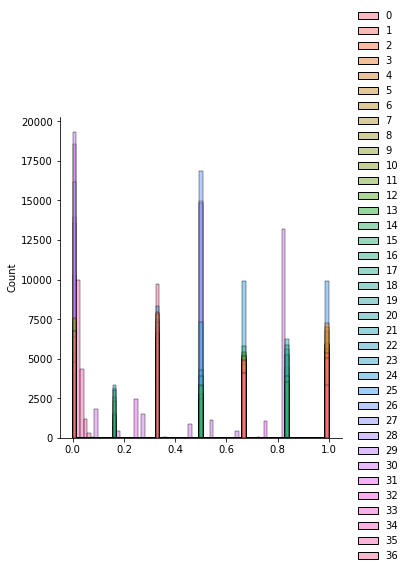

In [294]:
sns.displot(X_train_scaled)

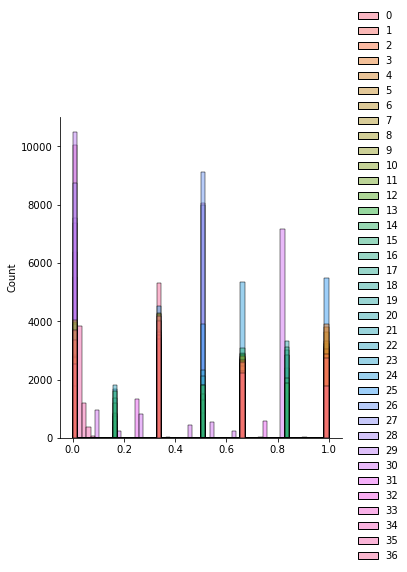

In [295]:
sns.displot(X_test_scaled)

C:\Users\muham\AppData\Local\Temp\ipykernel_5996\2261255524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)


Accuracy: 0.932
F1_Score: 0.93
Recall_Score: 0.932
Precision_Score: 0.931


c:\Users\muham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\muham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\muham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\muham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Cross Validation Score: 0.929
                  precision    recall  f1-score   support

Extremely Severe     0.9855    0.9884    0.9869      3634
            Mild     0.8536    0.6968    0.7673      1138
        Moderate     0.8642    0.9198    0.8911      2256
          Normal     0.9486    0.9784    0.9633      2868
          Severe     0.9255    0.9086    0.9169      2023

        accuracy                         0.9316     11919
       macro avg     0.9155    0.8984    0.9051     11919
    weighted avg     0.9309    0.9316    0.9303     11919



c:\Users\muham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


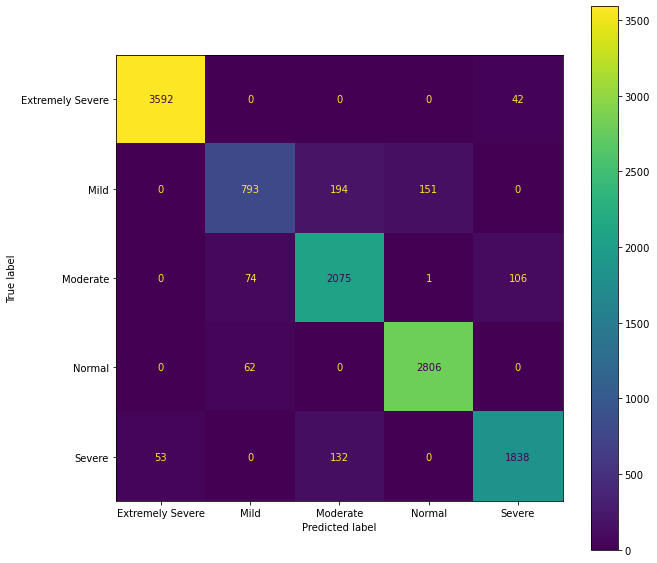

In [296]:
RanFor = RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran = round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran = round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran = round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran = round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification = classification_report(
    digits = 4,
    y_true = y_test,
    y_pred = RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

In [384]:
pd.set_option('display.max_columns', None)
X_train.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,engnat,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
29590,3,2,2,3,3,2,2,3,3,3,3,2,2,3,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0
16304,0,1,0,1,0,0,0,0,1,1,0,0,0,1,7,7,7,5,7,2,6,3,5,4,3,3,2,2,1,1,10,1,10,1,1,8,2.0
23932,0,0,1,1,3,3,2,0,2,2,1,1,1,3,1,2,6,4,4,7,5,3,6,3,2,2,1,2,2,1,12,1,60,2,1,5,2.0
39152,1,1,0,1,0,1,1,1,2,1,1,1,1,0,2,6,5,7,3,7,7,6,5,7,2,2,2,2,1,1,10,1,10,2,1,1,1.0
20567,1,3,3,3,3,3,3,3,3,2,3,3,3,2,1,6,3,6,2,6,5,5,3,5,2,1,2,2,1,1,10,4,70,2,1,3,2.0


In [389]:
X_hasil = (3,2,2,3,3,2,2,3,3,3,3,2,2,3,1,6,7,5,1,7,3,6,7,5,2,1,1,1,1,3,6,1,60,2,1,3,1.0)

X_hasil_numpy = np.asarray(X_hasil)

X_hasil_reshaped = X_hasil_numpy.reshape(1,-1)

hasil_akhir = RanFor.predict(X_hasil_reshaped)
print(hasil_akhir)

['Extremely Severe']
